# EDA And Modelling Part I
Date: 2021.11.16<br>

### Report Objectives

This report will combine the cleaned data from our four sources, Port Hardy Weather Ballon Station, Quillatyute Weather Ballon Station, Roundhouse Weather Station, and PowDay.com.  We will build a data frame with all values that we believe may be predictors, conduct EDA to understand which variables will be most useful, and build some simple models.

### Library and Data Imports

In [92]:
# data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# managing timestamps
from datetime import datetime
from datetime import timedelta

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# import data
pow_day_df = pd.read_csv('./Data/PowDayHistoryClean.csv')
ph_df = pd.read_csv('./Data/PortHardyClean.csv')
q_df = pd.read_csv('./Data/QuillayuteClean.csv')
rh_df = pd.read_csv('./Data/RoundHouseClean.csv')

In [3]:
# confirm things imported correctly
display(pow_day_df.head(),
        ph_df.head(),
        q_df.head(),
        rh_df.head())

,time,lift,day_status
0,2014-12-31 00:00:00,Whistler Village Gondola,0
1,2014-12-31 00:00:00,Jersey Cream,0
2,2014-12-31 00:00:00,Crystal,0
3,2014-12-31 00:00:00,7th Heaven,0
4,2014-12-31 00:00:00,Glacier,0


,DATE,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT
0,2014-12-31 16:00:00,703.983333,3123.833333,-1.633333,-9.100000,57.666667,2.776667,335.000000,25.000000
1,2015-01-01 04:00:00,715.000000,2961.000000,-1.500000,-8.000000,61.500000,2.940000,336.000000,16.500000
2,2015-01-01 16:00:00,705.680000,3013.800000,-3.080000,-4.260000,91.800000,3.990000,287.600000,35.000000
3,2015-01-02 04:00:00,698.766667,3012.666667,-9.544444,-26.155556,46.444444,1.250000,267.222222,36.111111
4,2015-01-02 16:00:00,710.375000,2863.750000,-11.550000,-25.250000,36.750000,0.795000,324.000000,24.250000


,DATE,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT
0,2014-12-31 16:00:00,701.500000,3139.000000,-1.200000,-10.200000,50.000000,2.525000,15.000000,19.000000
1,2015-01-01 04:00:00,694.366667,3186.777778,-0.822222,-12.644444,40.555556,2.111111,340.555556,12.888889
2,2015-01-01 16:00:00,690.750000,3206.750000,-2.100000,-10.175000,55.250000,2.615000,335.000000,16.250000
3,2015-01-02 04:00:00,702.800000,3038.000000,-2.320000,-7.220000,69.400000,3.186000,280.800000,35.600000
4,2015-01-02 16:00:00,717.975000,2808.250000,-4.225000,-41.975000,3.750000,0.147500,289.500000,39.250000


,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
0,2015-01-01,4.5,0.5,2.5,0.0,0,0.0,1,117.0
1,2015-01-02,-3.0,-6.0,-4.5,0.0,0,0.0,1,116.0
2,2015-01-03,-6.0,-9.0,-7.5,0.0,0,5.0,0,115.0
3,2015-01-04,0.0,-8.0,-4.0,0.0,0,33.0,0,132.0
4,2015-01-05,3.0,-5.0,-1.0,23.0,0,6.0,0,149.0


It looks like everything is in order.  Let's check the data types of our columns.

In [4]:
# check column info
display(pow_day_df.info(),
        ph_df.info(),
        q_df.info(),
        rh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        26264 non-null  object
 1   lift        26264 non-null  object
 2   day_status  26264 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 615.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2295 non-null   object 
 1   PRES    2295 non-null   float64
 2   HGHT    2295 non-null   float64
 3   TEMP    2295 non-null   float64
 4   DWPT    2295 non-null   float64
 5   RELH    2295 non-null   float64
 6   MIXR    2295 non-null   float64
 7   DRCT    2295 non-null   float64
 8   SKNT    2295 non-null   float64
dtypes: float64(8), object(1)
memory usage: 161.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385

None

None

None

None

Everything looks good except for the date columns.  Let's change each of these to a datetime.

In [5]:
# change each df's data column to a datetime object
pow_day_df['time'] = pd.to_datetime(pow_day_df['time'])
ph_df['DATE'] = pd.to_datetime(ph_df['DATE'])
q_df['DATE'] = pd.to_datetime(q_df['DATE'])
rh_df['Date/Time'] = pd.to_datetime(rh_df['Date/Time'])

# confirm it has worked
display(pow_day_df['time'].dtypes,
        ph_df['DATE'].dtypes,
        q_df['DATE'].dtypes,
        rh_df['Date/Time'].dtypes)

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

With all of our date/time columns now in datetime format, let's move onto buildling our final data frame layout with all the information we need.

### Data Wrangling

Here we are going to construct a data frame where reach row consists of a target, the lift status for that day, and all the variables we think may be important from the data sets above.  Specifically, we are going to include:
- Weather data from the past 5 days
- Chair status for the previous 5 days
- Weather for the current day
- Day of the week

We are including weather for the current day as a proxy for weather forcast for the current day.  We will try the model with these values as is at first.  We may need to build some 'noise' into this data for future iterations to try and mimic the uncertainty of weather forecasts.  We are including day of the week due to our experiences skiing WhistlerBlackcomb.  The intuition is that given fixed anticedent weather conditions, the likelihood of the alpine lifts being opened increases considerably on Saturdays after a large storm cycle.

To begin, we are also going to focus on the Peak chair only.  It has one of the lower opening rates of all the alpine lifts at 75.9%, its opening is not dependent on other lower-frequency opening chairs being in operation (ex. Symphony will never open if Harmony is not open first), and the goal of WhistlerBlackcomb is to have it open every day they can as opposed to the T-Bars or Franz's which may be closed due to lower guest numbers on the mountain.

To help facilitate exploring other chairs later, let's start by building the weather portion of the data frame first.  Chair specific information can be tacked on as needed for each chair later.  We will use the date/time from the pow_day_df as the reference point.

Let's start by building out the column names with prefixes based on source dataframe and suffixes denoting lags.  One thing to note here.  Because we have two observations for the ballon data each day at 4AM and 4PM, lag 0 for the ballon data will correspond to the data point at 4PM on the day we are predicting the lift status for.  We may revisit this later. 

In [6]:
# get an empty list of column names to build column names on
col_names = []

# list of lag values to attach to each column from ballon data
ballon_suffixes = []
for lag in range(0, 144, 12):
    ballon_suffixes.append(f"_L{lag}h")
    
# build column names from Port Hardy dataset
# loop through all columns
for col in ph_df.columns:
    
    # don't take the date column
    if col != 'DATE':
        
        # add each suffix to the column name
        for lag in ballon_suffixes:
            col_names.append(f"ph_{col}{lag}")

# build column names from Quillayute dataset
# loop through all columns
for col in q_df.columns:
    
    # don't take the date column
    if col != 'DATE':
        
        # add each suffix to the column name
        for lag in ballon_suffixes:
            col_names.append(f"q_{col}{lag}")

# build lag suffixes for powday and roundhouse data
pow_rh_suffixes = []
for lag in range(0,121, 24):
    pow_rh_suffixes.append(f"_L{lag}h")

# build column names for roundhouse data
for col in rh_df.columns:
    
    # don't take the date/time column
    if col != 'Date/Time':
        
        # add each suffix to the column name
        for lag in pow_rh_suffixes:
            col_names.append(f"rh_{col}{lag}")

# build column names for powday data
col = 'day_status'

# add each suffix to the column name
for lag in pow_rh_suffixes:
    col_names.append(f"pow_{col}{lag}")

# add a day of the week column
col_names.append('day_of_week')

# check to see it all has worked
col_names

['ph_PRES_L0h',
 'ph_PRES_L12h',
 'ph_PRES_L24h',
 'ph_PRES_L36h',
 'ph_PRES_L48h',
 'ph_PRES_L60h',
 'ph_PRES_L72h',
 'ph_PRES_L84h',
 'ph_PRES_L96h',
 'ph_PRES_L108h',
 'ph_PRES_L120h',
 'ph_PRES_L132h',
 'ph_HGHT_L0h',
 'ph_HGHT_L12h',
 'ph_HGHT_L24h',
 'ph_HGHT_L36h',
 'ph_HGHT_L48h',
 'ph_HGHT_L60h',
 'ph_HGHT_L72h',
 'ph_HGHT_L84h',
 'ph_HGHT_L96h',
 'ph_HGHT_L108h',
 'ph_HGHT_L120h',
 'ph_HGHT_L132h',
 'ph_TEMP_L0h',
 'ph_TEMP_L12h',
 'ph_TEMP_L24h',
 'ph_TEMP_L36h',
 'ph_TEMP_L48h',
 'ph_TEMP_L60h',
 'ph_TEMP_L72h',
 'ph_TEMP_L84h',
 'ph_TEMP_L96h',
 'ph_TEMP_L108h',
 'ph_TEMP_L120h',
 'ph_TEMP_L132h',
 'ph_DWPT_L0h',
 'ph_DWPT_L12h',
 'ph_DWPT_L24h',
 'ph_DWPT_L36h',
 'ph_DWPT_L48h',
 'ph_DWPT_L60h',
 'ph_DWPT_L72h',
 'ph_DWPT_L84h',
 'ph_DWPT_L96h',
 'ph_DWPT_L108h',
 'ph_DWPT_L120h',
 'ph_DWPT_L132h',
 'ph_RELH_L0h',
 'ph_RELH_L12h',
 'ph_RELH_L24h',
 'ph_RELH_L36h',
 'ph_RELH_L48h',
 'ph_RELH_L60h',
 'ph_RELH_L72h',
 'ph_RELH_L84h',
 'ph_RELH_L96h',
 'ph_RELH_L108h',
 'ph_R

With our column names defined, let's build our data frame.  We will use the unique days from powday as our index, and the column names to setup our columns.  We will fill the entire data frame with NaN values for now so it is easy to see where we are missing any data later.

In [7]:
# extract all unique dates from the date-time column
ref_dates = pow_day_df['time'].apply(lambda d: d.date()).unique()

# build data frame and fill with NaN values
model_template_df = pd.DataFrame(np.NaN, index = ref_dates, columns = col_names)

# check to see it worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like that has worked well.  In this data frame, our target column is the lift status for the current day.  This is in column `pow_day_status_L0h`.  We will populate all of the weather data columns now and keep this as our template.  From there, we can inject the information from each lift one at a time.

In [8]:
# fill all Port Hardy trailing data points

# loop through all target dates
for target_date in model_template_df.index:

    # force target date time to match first expected record (4PM for the current day)
    target_date_with_time = datetime(target_date.year, target_date.month, target_date.day, 16)
    
    # loop to cycle through all of our lags
    for lag in range(0, 144, 12):

        # get record for correct lag period
        lag_record = ph_df[ph_df['DATE'].apply(lambda d: d + timedelta(hours = lag)) == target_date_with_time]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'DATE':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'ph_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [9]:
# check it has worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above looks like it has worked well and we have successfully transposed out Port Hardy data set.  Let's repeat the above for the Quillayute data set and the PowDay data set.

In [10]:
# fill all Quillayute trailing data points

# loop through all target dates
for target_date in model_template_df.index:

    # force target date time to match first expected record (4PM for the current day)
    target_date_with_time = datetime(target_date.year, target_date.month, target_date.day, 16)
    
    # loop to cycle through all of our lags
    for lag in range(0, 144, 12):

        # get record for correct lag period
        lag_record = q_df[q_df['DATE'].apply(lambda d: d + timedelta(hours = lag)) == target_date_with_time]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'DATE':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'q_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [11]:
# check it has worked
cols = []

for col in model_template_df:
    if col.find('q_') != -1:
         cols.append(col)

model_template_df[cols]

,q_PRES_L0h,q_PRES_L12h,q_PRES_L24h,q_PRES_L36h,q_PRES_L48h,q_PRES_L60h,q_PRES_L72h,q_PRES_L84h,q_PRES_L96h,q_PRES_L108h,...,q_SKNT_L24h,q_SKNT_L36h,q_SKNT_L48h,q_SKNT_L60h,q_SKNT_L72h,q_SKNT_L84h,q_SKNT_L96h,q_SKNT_L108h,q_SKNT_L120h,q_SKNT_L132h
2014-12-31,701.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,690.750,694.366667,701.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,717.975,702.800000,690.750,694.366667,701.500,NaN,NaN,NaN,NaN,NaN,...,16.250000,12.888889,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,691.425,702.980000,717.975,702.800000,690.750,694.366667,701.50,NaN,NaN,NaN,...,39.250000,35.600000,16.250000,12.888889,19.000000,NaN,NaN,NaN,NaN,NaN
2015-01-04,712.850,693.700000,691.425,702.980000,717.975,702.800000,690.75,694.366667,701.5,NaN,...,28.875000,33.400000,39.250000,35.600000,16.250000,12.888889,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,703.400,691.200000,699.300,700.000000,713.500,697.666667,699.50,698.666667,694.5,700.800000,...,16.900000,45.000000,31.000000,26.000000,17.500000,28.000000,28.0,28.2,23.5,13.0
2021-03-26,699.750,688.500000,703.400,691.200000,699.300,700.000000,713.50,697.666667,699.5,698.666667,...,33.000000,25.400000,16.900000,45.000000,31.000000,26.000000,17.5,28.0,28.0,28.2
2021-03-27,693.750,698.857143,699.750,688.500000,703.400,691.200000,699.30,700.000000,713.5,697.666667,...,36.583333,42.000000,33.000000,25.400000,16.900000,45.000000,31.0,26.0,17.5,28.0
2021-03-28,NaN,NaN,693.750,698.857143,699.750,688.500000,703.40,691.200000,699.3,700.000000,...,33.500000,23.857143,36.583333,42.000000,33.000000,25.400000,16.9,45.0,31.0,26.0


Again, looks like tranposing our Quillayute data set has been successful.  Next up is the Roundhouse data set.

In [12]:
# fill all Roundhouse trailing data points

# loop through all target dates
for target_date in model_template_df.index:
    
    # loop to cycle through all of our lags - must be in hours to match with column names
    for lag in range(0, 144, 24):

        # get record for correct lag period
        lag_record = rh_df[rh_df['Date/Time'].apply(lambda d: d.date() + timedelta(days = lag/24)) == target_date]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'Date/Time':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'rh_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [13]:
# check it has worked
cols = []

for col in model_template_df:
    if col.find('rh_') != -1:
         cols.append(col)

model_template_df[cols]

,rh_Max Temp (°C)_L0h,rh_Max Temp (°C)_L24h,rh_Max Temp (°C)_L48h,rh_Max Temp (°C)_L72h,rh_Max Temp (°C)_L96h,rh_Max Temp (°C)_L120h,rh_Min Temp (°C)_L0h,rh_Min Temp (°C)_L24h,rh_Min Temp (°C)_L48h,rh_Min Temp (°C)_L72h,...,rh_Total Snow Flag_L48h,rh_Total Snow Flag_L72h,rh_Total Snow Flag_L96h,rh_Total Snow Flag_L120h,rh_Snow on Grnd (cm)_L0h,rh_Snow on Grnd (cm)_L24h,rh_Snow on Grnd (cm)_L48h,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,4.5,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,-3.0,4.5,NaN,NaN,NaN,NaN,-6.0,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,116.0,117.0,NaN,NaN,NaN,NaN
2015-01-03,-6.0,-3.0,4.5,NaN,NaN,NaN,-9.0,-6.0,0.5,NaN,...,1.0,NaN,NaN,NaN,115.0,116.0,117.0,NaN,NaN,NaN
2015-01-04,0.0,-6.0,-3.0,4.5,NaN,NaN,-8.0,-9.0,-6.0,0.5,...,1.0,1.0,NaN,NaN,132.0,115.0,116.0,117.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,2.0,2.0,-2.0,-0.5,-5.0,-2.5,-6.0,-5.5,-7.0,-9.0,...,0.0,0.0,0.0,1.0,280.0,285.0,284.0,289.0,290.0,298.0
2021-03-26,1.0,2.0,2.0,-2.0,-0.5,-5.0,-5.5,-6.0,-5.5,-7.0,...,1.0,0.0,0.0,0.0,275.0,280.0,285.0,284.0,289.0,290.0
2021-03-27,-0.5,1.0,2.0,2.0,-2.0,-0.5,-4.5,-5.5,-6.0,-5.5,...,0.0,1.0,0.0,0.0,274.0,275.0,280.0,285.0,284.0,289.0
2021-03-28,-3.5,-0.5,1.0,2.0,2.0,-2.0,-5.5,-4.5,-5.5,-6.0,...,0.0,0.0,1.0,0.0,287.0,274.0,275.0,280.0,285.0,284.0


With all of our weather data successfully transposed, the last thing to do is fill in the day of the week column based on the index.

In [14]:
day_of_week = []

for i in range(0, model_template_df.shape[0]):
    day_of_week.append(model_template_df.index[i].strftime('%a'))

model_template_df['day_of_week'] = day_of_week

model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thu
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fri
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sat
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,289.0,290.0,298.0,NaN,NaN,NaN,NaN,NaN,NaN,Thu
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,284.0,289.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,Fri
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,285.0,284.0,289.0,NaN,NaN,NaN,NaN,NaN,NaN,Sat
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,280.0,285.0,284.0,NaN,NaN,NaN,NaN,NaN,NaN,Sun


Now we are going to one-hot-encode the day of week column, dropping one of them to prevent co-linearity.

In [15]:
# one hot encode day of week and drop the first day
model_template_df = pd.get_dummies(model_template_df,
                                   columns = ['day_of_week'],
                                   drop_first = True)
# check it worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,1
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,0,0,0,0
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,NaN,NaN,NaN,NaN,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,NaN,NaN,NaN,NaN,0,1,0,0,0,0
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,NaN,NaN,NaN,NaN,0,0,1,0,0,0


The last thing we need to do before we move on is to transform all of the wind direction (DRCT) columns out of the current coordinate system.  Currently, they are logged as degrees from 0 to 360.  The issue with this is that while we understand 0 degerees and 360 degress to be the same direction, a machine learning model will see them as polar opposites (~~no~~ pun intended).  In order to solve this, we apply two transformations to the angle value resulting in two values representing the direction.  The formulas used are:
$$ \sin(2\pi\times\frac{\text{angle}}{360}) $$
$$ \cos(2\pi\times\frac{\text{angle}}{360}) $$

Each of these converts the angle to radians and then applies either a $\cos()$ or $\sin()$ funtion, resulting in a unique pairing of numbers.  This approach was taekn from [this post](https://mattgorb.github.io/wind) and subsequent references found on that website.

In [16]:
# list to store column names
drct_cols = []

# find all columns with DRCT in the column header
for col in model_template_df.columns:
    if col.find('DRCT') != -1:
        drct_cols.append(col)

# for each column in our subset
for col in drct_cols:
    
    # set the slice value dependent on the prefix length
    if col[0] == 'q':
        split = 2
    else:
        split = 3
    
    # compose sin column name
    sin_col = f"{col[:split]}sin_{col[split:]}"
    
    # calculate sin transform and store in a new column
    model_template_df[sin_col] = np.sin(model_template_df[col]/360*2*np.pi)
    
    # compose cos column name
    cos_col = f"{col[:split]}cos_{col[split:]}"
    
    # calculate cos transform and store in a new column
    model_template_df[cos_col] = np.cos(model_template_df[col]/360*2*np.pi)
    
    # delete the original column
    model_template_df.drop(columns = col, inplace = True)

In [17]:
# confirm the above worked

print("List of columns not dropped:")
for col in drct_cols:
    if col in model_template_df.columns:
        print(col)
print(end='\n\n')

new_cols = 0
print("List of new colums:")
for col in model_template_df.columns:
    if col.find('DRCT') != -1:
        print(col, end = ', ')
        new_cols += 1
print("Total new columns: ", new_cols)

List of columns not dropped:


List of new colums:
ph_sin_DRCT_L0h, ph_cos_DRCT_L0h, ph_sin_DRCT_L12h, ph_cos_DRCT_L12h, ph_sin_DRCT_L24h, ph_cos_DRCT_L24h, ph_sin_DRCT_L36h, ph_cos_DRCT_L36h, ph_sin_DRCT_L48h, ph_cos_DRCT_L48h, ph_sin_DRCT_L60h, ph_cos_DRCT_L60h, ph_sin_DRCT_L72h, ph_cos_DRCT_L72h, ph_sin_DRCT_L84h, ph_cos_DRCT_L84h, ph_sin_DRCT_L96h, ph_cos_DRCT_L96h, ph_sin_DRCT_L108h, ph_cos_DRCT_L108h, ph_sin_DRCT_L120h, ph_cos_DRCT_L120h, ph_sin_DRCT_L132h, ph_cos_DRCT_L132h, q_sin_DRCT_L0h, q_cos_DRCT_L0h, q_sin_DRCT_L12h, q_cos_DRCT_L12h, q_sin_DRCT_L24h, q_cos_DRCT_L24h, q_sin_DRCT_L36h, q_cos_DRCT_L36h, q_sin_DRCT_L48h, q_cos_DRCT_L48h, q_sin_DRCT_L60h, q_cos_DRCT_L60h, q_sin_DRCT_L72h, q_cos_DRCT_L72h, q_sin_DRCT_L84h, q_cos_DRCT_L84h, q_sin_DRCT_L96h, q_cos_DRCT_L96h, q_sin_DRCT_L108h, q_cos_DRCT_L108h, q_sin_DRCT_L120h, q_cos_DRCT_L120h, q_sin_DRCT_L132h, q_cos_DRCT_L132h, Total new columns:  48


In [18]:
# check values in those columns
model_template_df.iloc[:,-48:].describe().T

,count,mean,std,min,25%,50%,75%,max
ph_sin_DRCT_L0h,906.0,-0.395363,0.549511,-1.0,-0.868817,-0.531152,-0.057056,0.999990
ph_cos_DRCT_L0h,906.0,-0.319418,0.663715,-1.0,-0.924711,-0.533245,0.223533,0.996685
ph_sin_DRCT_L12h,913.0,-0.403660,0.551472,-1.0,-0.861629,-0.549509,-0.091502,1.000000
ph_cos_DRCT_L12h,913.0,-0.308545,0.662232,-1.0,-0.922201,-0.549509,0.216440,1.000000
ph_sin_DRCT_L24h,904.0,-0.397201,0.548069,-1.0,-0.869493,-0.534352,-0.058145,0.999990
ph_cos_DRCT_L24h,904.0,-0.319303,0.663865,-1.0,-0.924157,-0.533245,0.220697,0.996685
ph_sin_DRCT_L36h,911.0,-0.404228,0.550130,-1.0,-0.863836,-0.549509,-0.092226,1.000000
ph_cos_DRCT_L36h,911.0,-0.310084,0.662282,-1.0,-0.922762,-0.549509,0.209329,1.000000
ph_sin_DRCT_L48h,902.0,-0.398727,0.547422,-1.0,-0.873822,-0.532630,-0.059597,0.999990
ph_cos_DRCT_L48h,902.0,-0.322003,0.662177,-1.0,-0.926635,-0.533245,0.218569,0.996685


A visual scan of the above shows that we have created a sin and cos column for each direction column, removed the original direction column, and that the values in each of our new columns fall bewteen -1 and 1 as expected.  Now let's convert all of our wind speed columns for a unit of knots/hr to a unit of km/hr.

In [70]:
# change all wind speed columns to km/hr from knots per hour 1.852 conversion
for col in model_template_df.columns:
    if col.find('SKNT') != -1:
        model_template_df[col] = model_template_df[col].apply(lambda knots: knots*1.852)

We have now completed our model template.  The plan from here is to plug one chair of data into the PowDay columns, drop records containing NaN, and start getting a look at some correlations.

### EDA - Peak Chair

As mentioned, we will start with analyzing the Peak chair.  The first thing to do is to get the appropriate data into our template.

In [19]:
# create a copy
peak_df = model_template_df.copy(deep = True)

In [20]:
peak_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,-0.332893,0.942965,0.258819,0.965926,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648,-0.788011,0.615661,-0.959642,0.281225
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,-0.406737,0.913545,-0.495459,0.868632,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164


In [21]:
# fill all PowDay trailing data points

# loop through all target dates
for target_date in peak_df.index:
    
    # loop to cycle through all of our lags - must be in hours to match with column names
    for lag in range(0, 144, 24):

        # get record for correct lag period
        lag_record = pow_day_df[(pow_day_df['time'].apply(lambda d: d.date() + timedelta(days = lag/24)) == target_date) &
                                           (pow_day_df['lift'] == 'Peak')]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # extract the day_status column only
            col = 'day_status'
                
            # compose target column name from dataframe name, column extracted, and lag value
            target_column_prefix = 'pow_'
            target_column_suffix = f"_L{abs(lag)}h"
            target_column = f"{target_column_prefix}{col}{target_column_suffix}"

            # write the lag_record to the correct row in model_template
            peak_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [22]:
# check it has worked
cols = []

for col in peak_df:
    if col.find('pow_') != -1:
         cols.append(col)

peak_df[cols]

,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h
2014-12-31,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,1.0,0.0,NaN,NaN,NaN,NaN
2015-01-02,1.0,1.0,0.0,NaN,NaN,NaN
2015-01-03,1.0,1.0,1.0,0.0,NaN,NaN
2015-01-04,1.0,1.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...
2021-03-25,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-26,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-27,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-28,0.0,1.0,1.0,1.0,1.0,1.0


Now we are going to move our date from the index to a column for easier comparisons moving forward.

In [23]:
# pull date out and then rename the column
peak_df.reset_index(inplace = True)
peak_df.rename(columns = {'index': 'Date'}, inplace = True)

# get into date time
peak_df['Date'] = pd.to_datetime(peak_df['Date'])

# check it has worked
peak_df

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
0,2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,...,-0.332893,0.942965,0.258819,0.965926,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,...,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648,-0.788011,0.615661,-0.959642,0.281225
934,2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,...,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648
935,2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,...,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819
936,2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,...,-0.406737,0.913545,-0.495459,0.868632,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164


Let's now check how many of our records contain NaN values.  The plan for the first model pass through is going to be to simply drop them and see how our model does.

In [24]:
# total number of rows
rows = peak_df.shape[0]

# number of missing ros
missing_rows = rows - peak_df.dropna().shape[0]

print(f"Total rows: {rows}")
print(f"Missing rows: {missing_rows}")
print(f"Percent missing rows: {100*missing_rows/rows: .1f}%")

Total rows: 938
Missing rows: 268
Percent missing rows:  28.6%


That is a really high number of rows with missing data.  The issue here is that we are using each value from our weather data sets 6 times.  So any missing value in those data sets ends up giving us 6 rows with NaN values in our composite matrix.  In the case of a wind direction, a single missing wind direction can result in 12 affected rows.  There are two approaches to take from here.  First is to go backwards and come up with better imputation strategies to reduce the number of NaN values coming through.  The second is to drop the rows containing NaN and press forward.

We are going to take the second approach to allow us to get a baseline for our model.

In [25]:
# drop all rows with NaN values
peak_df = peak_df.dropna()

In [26]:
# check it worked
peak_df.isna().any(axis = 1).sum()

0

We are going to start by exploring the Total Snow on Ground feature.  Our expectations is that we will find some minimum value below which the Peak chair will never open.  Our hope is that the range of values over which this happens each season is relatively small.  In order to do this, we will look for the first day in each season that the Peak chair opens, and note the depth of the base in the days leading up to that day.  Once a chair lift has opened, in our expericence, it has never closed due to a lack of snow base.

In [27]:
# list of years we have data from season start for
season_years = [2016, 2017, 2018, 2019, 2020]

for season_year in season_years:
    
    if season_year == 2016:

        # search for the dates after November in a given year that have the lift open
        # and take the first one
        opening_days_df = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                                  (peak_df['Date'] > datetime(season_year, 11, 1)) &
                                  (peak_df['pow_day_status_L0h'] == 1)].head(1)
    else:
        annual_open = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                              (peak_df['Date'] > datetime(season_year, 11, 1)) &
                              (peak_df['pow_day_status_L0h'] == 1)].head(1)
        opening_days_df = opening_days_df.append(annual_open)
        
opening_days_df        

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
266,2016-11-30,701.180,697.075000,704.716667,696.250000,699.50,697.214286,692.725000,701.2500,703.700,...,-0.884988,0.465615,-0.236273,0.971687,-0.500000,-0.866025,0.562805,-0.826590,-0.906308,-0.422618
420,2017-12-02,704.900,701.100000,693.100000,702.728571,701.60,703.775000,708.666667,712.0000,708.100,...,-0.990268,0.139173,-0.999577,-0.029085,-0.723369,-0.690462,-0.997250,0.074108,-0.938694,-0.344752
566,2018-12-01,699.975,705.700000,692.028571,703.560000,706.52,701.566667,699.550000,702.3375,705.725,...,-0.763796,-0.645458,-0.642788,-0.766044,-0.566406,-0.824126,-0.707107,-0.707107,-0.573576,-0.819152
823,2020-12-05,712.850,717.933333,713.000000,706.000000,700.40,713.850000,704.675000,700.5000,702.940,...,0.642788,-0.766044,0.999932,-0.011635,-0.551937,0.833886,-0.876154,0.482032,-0.584250,-0.811574


From the above, it looks like in 2019/2020 the Peak chair did not open until after the New Year.  Let's see if we can pull that out.

In [28]:
# set our year
season_year = 2020

# find our first opening
annual_open = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                              (peak_df['Date'] < datetime(season_year, 2, 1)) &
                              (peak_df['pow_day_status_L0h'] == 1)].head(1)
annual_open

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
753,2020-01-14,706.75,701.55,697.0,703.45,701.35,702.0,705.8,696.975,696.966667,...,-0.768842,0.639439,-0.652287,-0.757972,-0.997859,-0.065403,-0.78152,0.62388,-0.916363,0.400349


The Peak chair did not open until January 14th that season.  Hopefully that provides us some good information regarding snow cover.  Let's get that last record with the rest to see what the snow pack was doing in the days leading up to the first opening.

In [29]:
# add 2020 record to df
opening_days_df = opening_days_df.append(annual_open)

# confirm it worked
opening_days_df

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
266,2016-11-30,701.180,697.075000,704.716667,696.250000,699.50,697.214286,692.725000,701.2500,703.700000,...,-0.884988,0.465615,-0.236273,0.971687,-0.500000,-0.866025,0.562805,-0.826590,-0.906308,-0.422618
420,2017-12-02,704.900,701.100000,693.100000,702.728571,701.60,703.775000,708.666667,712.0000,708.100000,...,-0.990268,0.139173,-0.999577,-0.029085,-0.723369,-0.690462,-0.997250,0.074108,-0.938694,-0.344752
566,2018-12-01,699.975,705.700000,692.028571,703.560000,706.52,701.566667,699.550000,702.3375,705.725000,...,-0.763796,-0.645458,-0.642788,-0.766044,-0.566406,-0.824126,-0.707107,-0.707107,-0.573576,-0.819152
823,2020-12-05,712.850,717.933333,713.000000,706.000000,700.40,713.850000,704.675000,700.5000,702.940000,...,0.642788,-0.766044,0.999932,-0.011635,-0.551937,0.833886,-0.876154,0.482032,-0.584250,-0.811574
753,2020-01-14,706.750,701.550000,697.000000,703.450000,701.35,702.000000,705.800000,696.9750,696.966667,...,-0.768842,0.639439,-0.652287,-0.757972,-0.997859,-0.065403,-0.781520,0.623880,-0.916363,0.400349


In [30]:
# get a list of Snow on Ground days
snow_base_cols = []

for col in opening_days_df.columns:
    if col.find('Snow on Grnd (cm)') != -1:
        snow_base_cols.append(col)
        
# filter opening days for these columns
display(opening_days_df[snow_base_cols].sort_index())

opening_days_df = opening_days_df[snow_base_cols].sort_index()

,rh_Snow on Grnd (cm)_L0h,rh_Snow on Grnd (cm)_L24h,rh_Snow on Grnd (cm)_L48h,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h
266,178.0,180.0,194.0,200.0,188.0,185.0
420,159.0,149.0,143.0,136.0,132.0,128.0
566,68.0,67.0,64.0,64.0,57.0,58.0
753,194.0,198.0,196.0,194.0,191.0,192.0
823,88.0,92.0,94.0,96.0,99.0,98.0


In [31]:
# setup global plotting features
plt.rcParams['font.size'] = '16'

/tmp/ipykernel_4742/138059733.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['L0h', 'L24h', 'L48h', 'L72h', 'L96h', 'L120h'])


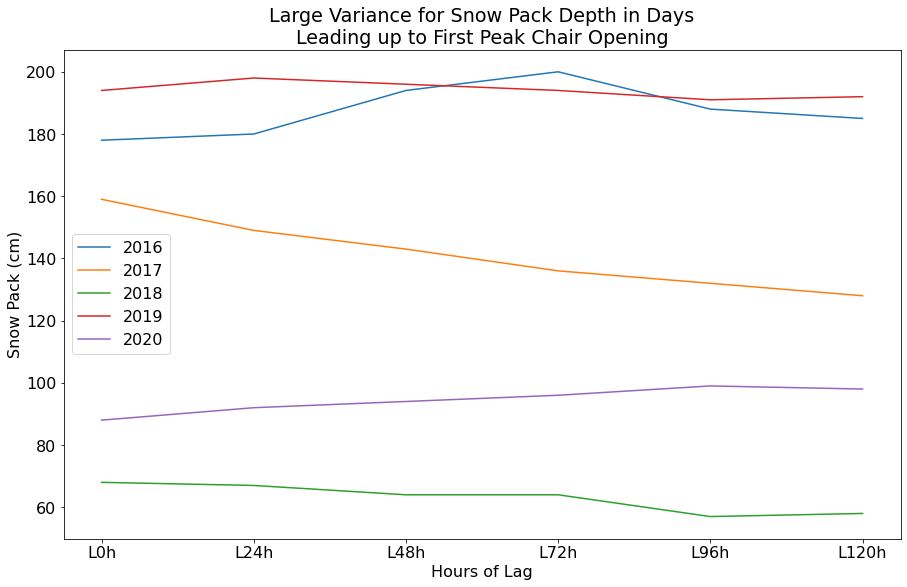

In [32]:
# plot the data
fig, ax = plt.subplots(figsize = (15,9))
plt.plot(opening_days_df.T, label = ['2016', '2017', '2018', '2019', '2020'])

plt.title('Large Variance for Snow Pack Depth in Days\nLeading up to First Peak Chair Opening')
plt.xlabel('Hours of Lag')
ax.set_xticklabels(['L0h', 'L24h', 'L48h', 'L72h', 'L96h', 'L120h'])
plt.ylabel('Snow Pack (cm)')

plt.legend()

plt.savefig('SnowPackDepth.png', dpi=192)

plt.show()

So unfortunatley, our hypothesis was incorrect.  There is a huge variance in snow pack depth on the day the Peak chair first opened.  A possible explaination may be that the snow depth is measured at roughly 1640m, where as the Peak chair runs from roughly 1800m to 2200m.  If precipitation was falling, and the freezing level was between the weather station and the base of the lift, there could be far more snow at the lift eleveations than the weather station record shows.  We do have the rain fall for measurements at the weather station.  With this, and the rough guide that snow fall depth is roughly 10x rainfall depth, we may be able to construct a metric which better indicates snow fall at the Peak chair elevation.  We will put this on a list of items to try during feature engineering later.

Let's move onto exploring some other features we think might be key.  Next on the list is the wind speed on any given day.  The assumption here is that there is some wind speed above which it is unsafe to open a chair lift.  Since we only have wind speeds for 4AM and 4PM, let's start by taking a look at both of them.

In [73]:
# get the min and max wind speeds monring and night from both stations
min_max_wind_speeds = peak_df[['ph_SKNT_L0h', 'ph_SKNT_L12h', 'q_SKNT_L0h', 'q_SKNT_L12h']].agg(['min', 'max']).T

# round min speeds down
min_max_wind_speeds['min'] = min_max_wind_speeds['min'].apply(lambda n: int(n))

# round max speeds up
min_max_wind_speeds['max'] = np.ceil(min_max_wind_speeds['max'])

# check it worked
min_max_wind_speeds

,min,max
ph_SKNT_L0h,2,146.0
ph_SKNT_L12h,2,181.0
q_SKNT_L0h,1,117.0
q_SKNT_L12h,2,138.0


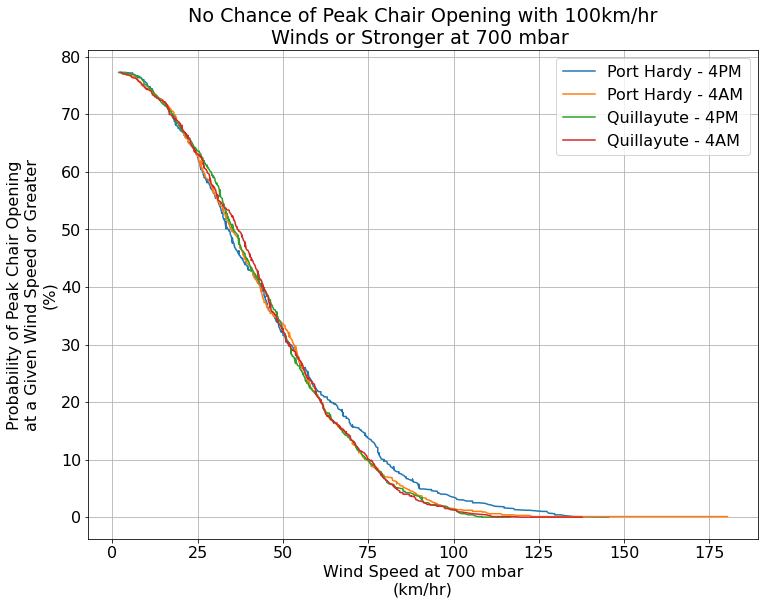

In [80]:
%%capture --no-display

# label dictionary
labels = {'ph_SKNT_L0h': 'Port Hardy - 4PM',
          'ph_SKNT_L12h': 'Port Hardy - 4AM',
          'q_SKNT_L0h': 'Quillayute - 4PM',
          'q_SKNT_L12h': 'Quillayute - 4AM'}

# create figure
plt.figure(figsize=(12,9))

# loop through colulmns to plot
for col in ['ph_SKNT_L0h', 'ph_SKNT_L12h', 'q_SKNT_L0h', 'q_SKNT_L12h']:
    
    # get just the columns we need into a smaller df
    tmp_df = peak_df[[col, 'pow_day_status_L0h']]

    # sort the values in descending order so cumulative sum gives highest percentage of openings to the lowest wind speed
    tmp_df.sort_values(col, ascending = False, inplace = True)

    # calculate the cumulative % of lift openings for each wind speed
    tmp_df['Percent_Lift_Openings'] = round(tmp_df['pow_day_status_L0h'].cumsum()/tmp_df.shape[0]*100,1)

    # resort from smallest to largest wind speed for interpretability on graph
    tmp_df.sort_values(col, ascending = True, inplace = True)

    # plot data
    plt.plot(tmp_df[col],
             tmp_df['Percent_Lift_Openings'],
             label = labels[col])

# add title, labels, etc
plt.title('No Chance of Peak Chair Opening with 100km/hr\nWinds or Stronger at 700 mbar ')
plt.xlabel('Wind Speed at 700 mbar\n(km/hr)')
plt.ylabel('Probability of Peak Chair Opening\nat a Given Wind Speed or Greater\n(%)')

# turn on features and show plot
plt.grid()
plt.legend()
plt.show()

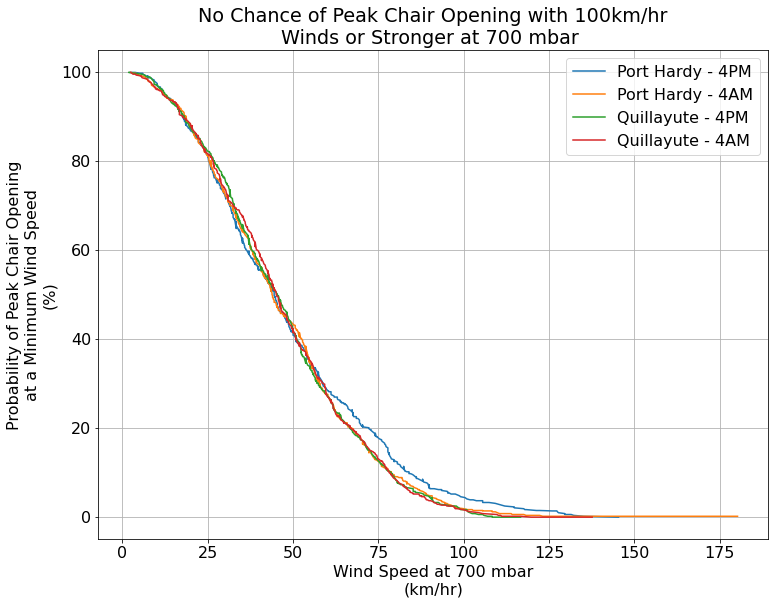

In [83]:
%%capture --no-display

# label dictionary
labels = {'ph_SKNT_L0h': 'Port Hardy - 4PM',
          'ph_SKNT_L12h': 'Port Hardy - 4AM',
          'q_SKNT_L0h': 'Quillayute - 4PM',
          'q_SKNT_L12h': 'Quillayute - 4AM'}

# create figure
plt.figure(figsize=(12,9))

# loop through colulmns to plot
for col in ['ph_SKNT_L0h', 'ph_SKNT_L12h', 'q_SKNT_L0h', 'q_SKNT_L12h']:
    
    # get just the columns we need into a smaller df
    tmp_df = peak_df[[col, 'pow_day_status_L0h']]

    # sort the values in descending order so cumulative sum gives highest percentage of openings to the lowest wind speed
    tmp_df.sort_values(col, ascending = False, inplace = True)

    # calculate the cumulative % of lift openings for each wind speed
    tmp_df['Percent_Lift_Openings'] = round(tmp_df['pow_day_status_L0h'].cumsum()/tmp_df['pow_day_status_L0h'].sum()*100,1)

    # resort from smallest to largest wind speed for interpretability on graph
    tmp_df.sort_values(col, ascending = True, inplace = True)

    # plot data
    plt.plot(tmp_df[col],
             tmp_df['Percent_Lift_Openings'],
             label = labels[col])

# add title, labels, etc
plt.title('No Chance of Peak Chair Opening with 100km/hr\nWinds or Stronger at 700 mbar ')
plt.xlabel('Wind Speed at 700 mbar\n(km/hr)')
plt.ylabel('Probability of Peak Chair Opening\nat a Minimum Wind Speed\n(%)')

# turn on features and show plot
plt.grid()
plt.legend()
plt.show()

From the above, we can see there is a minimal difference in how the wind speed affects chair opening probability across morning/evening measurements and across weather station locations.  Once all other variables are controlled for, when the winds at 700 mbar reach 100km/hr, the probability of the chair opening falls to almost 0.

### Left Off Here
- Do EDA:
    - Look for cutoff values of Total Snow above which the chair will not open
    - And what else???

### Baseline Modelling

At this point, let's run our data through a logistic model to get a baseline for how our relatively raw data predicts Peak chair openings.

In [88]:
# split data in to dependent and independent variables - drop the datetime column
X = peak_df.drop(columns = ['pow_day_status_L0h', 'Date'])
y = peak_df['pow_day_status_L0h']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# fit scaler on train data and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale test data
X_test_scaled = scaler.transform(X_test)

# fit logistic model and predict
logmod = LogisticRegression()
logmod.fit(X_train_scaled, y_train)
y_pred = logmod.predict(X_test_scaled)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 22  24]
 [ 24 131]]
              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        46
         1.0       0.85      0.85      0.85       155

    accuracy                           0.76       201
   macro avg       0.66      0.66      0.66       201
weighted avg       0.76      0.76      0.76       201



An overall accuracy of 76% means that we are no better than random guessing at this point, but at least we are no worse!  The precision and recall for predicting the chair is open gives us a little more hope.  Out of all the days the model said the Peak chair would open, it actually opened 85% of the time.  Further, of all the days the peak chair actually opened, the model correctly identified 85% of those days.  Let's try out a decision tree to see if the results are any different.

In [91]:
# fit decision tree and predict - don't worry about using scaled data
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 31  15]
 [ 25 130]]
              precision    recall  f1-score   support

         0.0       0.55      0.67      0.61        46
         1.0       0.90      0.84      0.87       155

    accuracy                           0.80       201
   macro avg       0.73      0.76      0.74       201
weighted avg       0.82      0.80      0.81       201



With a decision tree, our overall accuracy has increased to 80%, and almost all of our precision and recall scores have also increased.  Looking at the confusion matricies, the decision tree is doing a better job at identifying days that the Peak chair is closed.  Let's try out a KNN classifier here out of interest.

In [93]:
# fit logistic model and predict
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 19  27]
 [  8 147]]
              precision    recall  f1-score   support

         0.0       0.70      0.41      0.52        46
         1.0       0.84      0.95      0.89       155

    accuracy                           0.83       201
   macro avg       0.77      0.68      0.71       201
weighted avg       0.81      0.83      0.81       201



Using an out of the box KNN classifier, our accuracy has increased again, this time to 83%.  It appears to be going a great job of identifying days the Peak chair is open out of days it is actually open, but this is coming at the expense of some additional false positives, or saying the chair will open on days that it is not actually open.

### Feature Engineering

Now that we have a baseline performance for the modelling, let's see if we can improve it with some feature engineering.  Features we have previously identified are:
- Snow Pack at Peak Chair Elevation: Contruct from rainfall at Pig Alley weather station